In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
# # run only if version is not above 2.18.0
# !pip uninstall -y tensorflow
# !pip install tensorflow==2.18.0

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.7 MB/s eta 0:00:00


In [ ]:
import os
import csv
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read in the dataframe of images paths and labels
df = pd.read_csv('/content/drive/MyDrive/Final-project/merged_image_data.csv')
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  21165 non-null  object
 1   label       21165 non-null  object
dtypes: object(2)
memory usage: 330.8+ KB
None


In [ ]:
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# First, remove the .png file extension, then split into four new columns.
df[['Classification Type', 'Picture No.']] = df['label']\
                                                            .str.replace('.png', '', regex=False)\
                                                            .str.split('-', expand=True)
df.tail()

,image_path,label,Classification Type,Picture No.
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png,Viral Pneumonia,972
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png,Viral Pneumonia,741
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png,Viral Pneumonia,999
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png,Viral Pneumonia,755
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png,Viral Pneumonia,769


In [ ]:
# value counts for Classification Type
df['Classification Type'].value_counts()

,count
Classification Type,
Normal,10192
Lung_Opacity,6012
COVID,3616
Viral Pneumonia,1345


In [ ]:
# add a column called Classification and if the Classification Type is Normal, then the Classification it is Normal, if it is not Normal, then it is Abnormal
df['Classification'] = df['Classification Type'].apply(lambda x: 'Normal' if x == 'Normal' else 'Abnormal')
df.head()

,image_path,label,Classification Type,Picture No.,Classification
0,./Normal/images/Normal-6196.png,Normal-6196.png,Normal,6196,Normal
1,./Normal/images/Normal-7288.png,Normal-7288.png,Normal,7288,Normal
2,./Normal/images/Normal-1821.png,Normal-1821.png,Normal,1821,Normal
3,./Normal/images/Normal-4781.png,Normal-4781.png,Normal,4781,Normal
4,./Normal/images/Normal-4959.png,Normal-4959.png,Normal,4959,Normal


In [ ]:
df.tail()

,image_path,label,Classification Type,Picture No.,Classification
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png,Viral Pneumonia,972,Abnormal
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png,Viral Pneumonia,741,Abnormal
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png,Viral Pneumonia,999,Abnormal
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png,Viral Pneumonia,755,Abnormal
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png,Viral Pneumonia,769,Abnormal


In [ ]:
# Start with the userid column
# Look at the value counts to decide which encoder to use
df['Classification'].value_counts()

,count
Classification,
Abnormal,10973
Normal,10192


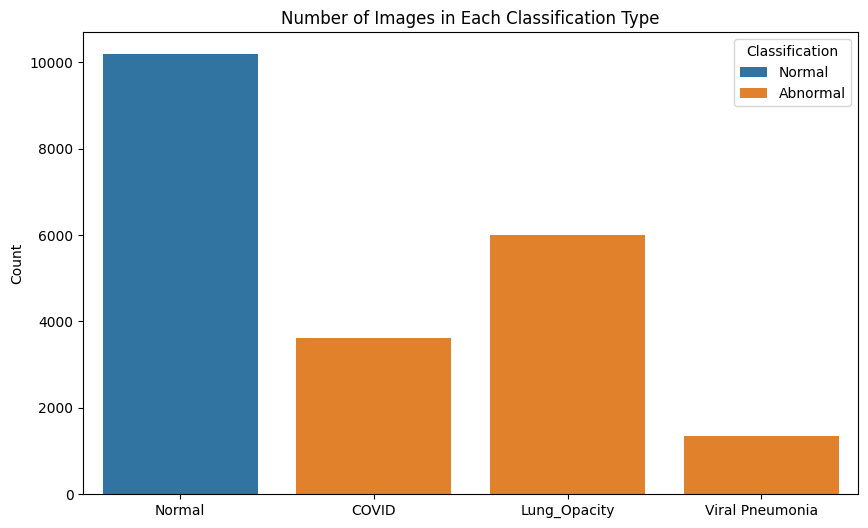

In [ ]:
# create a graph showing the number of images in each classification type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification Type', hue='Classification')
plt.title('Number of Images in Each Classification Type')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

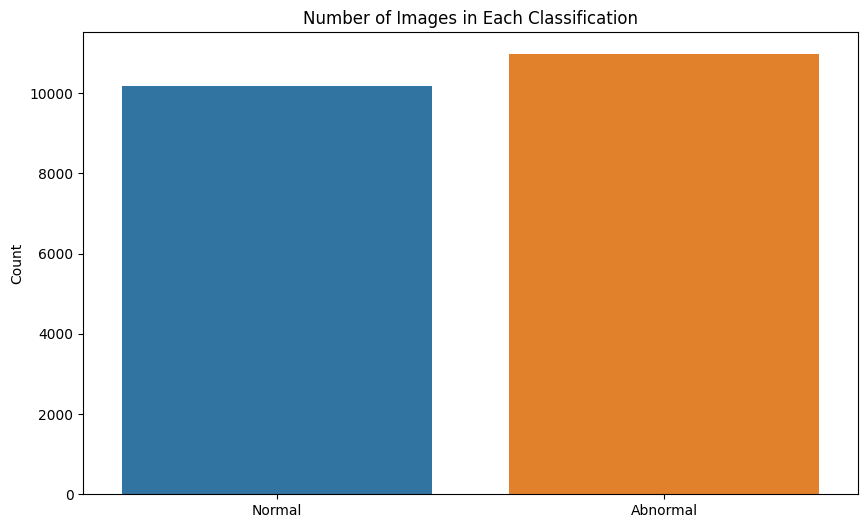

In [ ]:
# create a graph showing the number of images in each classification
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification', hue='Classification')
plt.title('Number of Images in Each Classification')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

In [ ]:
# Load the images from the img_preprocessed32.pkl file
import pickle

with open('/content/drive/MyDrive/Final-project/img_preprocessed.pkl', 'rb') as file:
    normalized_images = pickle.load(file)

normalized_images[0]

array([[0.9411765 , 0.91764706, 0.8901961 , ..., 0.827451  , 0.84705883,
        0.827451  ],
       [0.8666667 , 0.8509804 , 0.827451  , ..., 0.7411765 , 0.76862746,
        0.7529412 ],
       [0.7058824 , 0.5176471 , 0.41568628, ..., 0.6431373 , 0.6784314 ,
        0.6784314 ],
       ...,
       [0.80784315, 0.78431374, 0.79607844, ..., 0.75686276, 0.75686276,
        0.68235296],
       [0.8392157 , 0.80784315, 0.8117647 , ..., 0.7647059 , 0.77254903,
        0.7529412 ],
       [0.85882354, 0.8235294 , 0.8235294 , ..., 0.77254903, 0.78039217,
        0.77254903]], dtype=float32)

In [ ]:
# save normalized images as X
X = normalized_images

In [ ]:
# creat the y
y = df['Classification']
y.head()

,Classification
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [ ]:
# Check the total number of classes
y.nunique()

2

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
# Normalize and reshape the images to have 1 channel
import numpy as np
from sklearn.preprocessing import OneHotEncoder

y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train).reshape(-1, 1))
y_train_enc = y_encoder.transform(np.array(y_train).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))


X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train_enc)
y_test_np = np.array(y_test_enc)
print("Shape of y_train_enc:", y_train_np.shape)
print("Shape of y_test_enc:", y_test_np.shape)

Shape of y_train_enc: (15873, 2)
Shape of y_test_enc: (5292, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define a CNN model
from tensorflow.keras import layers, models

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

epochs = 10
history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 493s 985ms/step - accuracy: 0.7223 - loss: 0.5364 - val_accuracy: 0.8010 - val_loss: 0.4488
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 483s 948ms/step - accuracy: 0.8364 - loss: 0.3775 - val_accuracy: 0.8502 - val_loss: 0.3583
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 487s 918ms/step - accuracy: 0.8602 - loss: 0.3310 - val_accuracy: 0.8573 - val_loss: 0.3453
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 512s 938ms/step - accuracy: 0.8826 - loss: 0.2926 - val_accuracy: 0.8743 - val_loss: 0.3217
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.9004 - loss: 0.2528 - val_accuracy: 0.8776 - val_loss: 0.3156
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 509s 937ms/step - accuracy: 0.9205 - loss: 0.2067 - val_accuracy: 0.8859 - val_loss: 0.3027
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 525s 985ms/step - accuracy: 0.9357 - loss: 0.1701 - val_accuracy: 0.8766 - val_loss: 0.3238
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 473s 952ms/step - accuracy: 0.9498 - lo

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_np, y_test_np, verbose =2)

# Display the model loss and accuracy results
print(f' Loss: {model_loss}, Accuracy: {model_accuracy}')

166/166 - 54s - 326ms/step - accuracy: 0.9609 - loss: 0.1435
 Loss: 0.14354285597801208, Accuracy: 0.9608843326568604


In [ ]:
# Export the model to a keras file
# model.save('/content/drive/MyDrive/Final-project/x-ray_classifier_128.keras')

In [ ]:
# Load the model to a new object
model = tf.keras.models.load_model('/content/drive/MyDrive/Final-project/x-ray_classifier_128.keras')

In [ ]:
model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 42s - 256ms/step - accuracy: 0.9609 - loss: 0.1435


[0.14354285597801208, 0.9608843326568604]

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade tensorflow keras-tuner

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters in the first Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 1)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Tune the number of filters in the second Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Tune the number of filters in the third Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv3_filters', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.Flatten())

    # Tune the number of units in the Dense layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=64, step=32),
        activation='relu'
    ))

    # Output layer
    model.add(layers.Dense(2, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs for each configuration
    factor=3,       # Reduction factor for the number of configurations and epochs
    directory='/content/drive/MyDrive/Final-project/',  # Directory to save tuning results
    project_name='cnn_hyperband_128_trial3'   # Project name
)

Reloading Tuner from /content/drive/MyDrive/Final-project/cnn_hyperband_128_trial3/tuner0.json


In [ ]:
y_training_tuning = y_train.iloc[1:101]
print(y_training_tuning.value_counts())
y_test_tuning = y_test.iloc[4:14]
print(y_test_tuning.value_counts())

Classification
Abnormal    50
Normal      50
Name: count, dtype: int64
Classification
Abnormal    5
Normal      5
Name: count, dtype: int64


In [ ]:
# we don't have enough resource to do hyperparameters tuning with out entire training set
# let's reduce to training to 100 and testing to 10
y_train_tuning = y_train_np[1:101]
X_train_tuning = X_train_np[1:101]

y_test_tuning = y_test_np[4:14]
X_test_tuning = X_test_np[4:14]


In [ ]:
tuner.search(
    X_train_tuning, y_train_tuning,
    validation_data=(X_test_tuning, y_test_tuning),
    epochs=20,  # Number of epochs for each trial
    verbose=2   # Print progress
)

In [ ]:
# Get the best model
tuned_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Train the best model with more epochs
history = tuned_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=15,  # Train for more epochs
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
{'conv1_filters': 32, 'conv1_kernel': 3, 'conv2_filters': 128, 'conv2_kernel': 5, 'conv3_filters': 128, 'conv3_kernel': 3, 'dense_units': 32, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}
Epoch 1/15
497/497 - 1387s - 3s/step - accuracy: 0.7900 - loss: 0.4640 - val_accuracy: 0.8116 - val_loss: 0.4193
Epoch 2/15
497/497 - 1385s - 3s/step - accuracy: 0.8395 - loss: 0.3716 - val_accuracy: 0.8364 - val_loss: 0.3893
Epoch 3/15
497/497 - 1368s - 3s/step - accuracy: 0.8588 - loss: 0.3331 - val_accuracy: 0.8530 - val_loss: 0.3412
Epoch 4/15
497/497 - 1405s - 3s/step - accuracy: 0.8777 - loss: 0.2936 - val_accuracy: 0.8828 - val_loss: 0.2947
Epoch 5/15
497/497 - 1364s - 3s/step - accuracy: 0.8879 - loss: 0.2715 - val_accuracy: 0.8766 - val_loss: 0.3036
Epoch 6/15
497/497 - 1361s - 3s/step - accuracy: 0.8904 - loss: 0.2667 - val_accuracy: 0.8834 - val_loss: 0.2920
Epoch 7/15
497/497 - 139

In [ ]:
# Export the model to a keras file
tuned_model.save('/content/drive/MyDrive/Final-project/x-ray_classifier_tuned.keras')

In [ ]:
tuned_model.evaluate(X_test_np, y_test_np, verbose =2)

166/166 - 119s - 719ms/step - accuracy: 0.8862 - loss: 0.4808


[0.4807678461074829, 0.8862434029579163]